### Importing the libraries

In [294]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [297]:
knn_df = pd.read_csv('data//max_scaled_data')

In [299]:
knn_df.head()

,Unnamed: 0,KIDSDRIV,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0,0.0,0.0,0.478261,0.183497,0.0,0.000000,0.0,0.098592,0.204044,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.478261,0.249159,0.0,0.290588,0.0,0.154930,0.214224,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,0.478261,0.144078,0.0,0.000000,0.0,0.183099,0.315027,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,0.0,0.2,0.434783,0.043699,0.0,0.140284,1.0,0.035211,0.057499,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,0.0,0.0,0.608696,0.145844,0.0,0.345936,1.0,0.225352,0.221394,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [301]:
knn_df.shape

(10302, 45)

In [303]:
# Drop the 'Unnamed: 0' column
knn_df = knn_df.drop(columns=['Unnamed: 0','CLM_AMT'])

### Splitting the independent and dependent variables

In [306]:
# Assign features (all columns except column 17)
x = knn_df.iloc[:, knn_df.columns != knn_df.columns[16]]  # 16 is the index for the 17th column

# Assign target (the 1th column)
y = knn_df.iloc[:, [16]]  


In [308]:
x.columns

Index(['KIDSDRIV', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'GEN_AGE', 'GENDER_M',
       'GENDER_z_F', 'EDUCATION_<High School', 'EDUCATION_Bachelors',
       'EDUCATION_Masters', 'EDUCATION_PhD', 'EDUCATION_z_High School',
       'OCCUPATION_Clerical', 'OCCUPATION_Doctor', 'OCCUPATION_Home Maker',
       'OCCUPATION_Lawyer', 'OCCUPATION_Manager', 'OCCUPATION_Professional',
       'OCCUPATION_Student', 'OCCUPATION_z_Blue Collar', 'CAR_USE_Commercial',
       'CAR_USE_Private', 'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck',
       'CAR_TYPE_Pickup', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van',
       'CAR_TYPE_z_SUV', 'URBANICITY_Highly Urban/ Urban',
       'URBANICITY_z_Highly Rural/ Rural'],
      dtype='object')

In [310]:
y.columns

Index(['CLAIM_FLAG'], dtype='object')

### Splitting the dataset into Training and Testing 

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [315]:
# Ensure y_train and y_test are 1D arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [317]:
x_train.shape

(7211, 42)

In [319]:
x_test.shape

(3091, 42)

In [321]:
y_train.shape

(7211,)

In [323]:
y_test.shape

(3091,)

In [325]:
print(np.unique(y_train))


[0. 1.]


### Training the Model

In [157]:
model = KNeighborsClassifier(n_neighbors=1)
# Convert y_train to 1D using ravel()
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

## Get Predictions

In [159]:
pred = model.predict(x_test)
pred[0:5]

array([0., 1., 0., 1., 1.])

In [160]:
y_test[0:5]

array([0., 1., 0., 0., 1.])

## Get the Accuracy of the model

In [162]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.7068909737948884

In [163]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      2268
         1.0       0.44      0.40      0.42       823

    accuracy                           0.71      3091
   macro avg       0.62      0.61      0.61      3091
weighted avg       0.70      0.71      0.70      3091



## Find which k value gives the most no of correct predictions

In [280]:
correct_sum = []

# Train the KNN model and compare predictions
for i in range(1,45):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)

    # Predict the test set
    pred = model.predict(x_test)

    # Compare predictions with true labels
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

Text(0, 0.5, 'Sum of correct predictions')

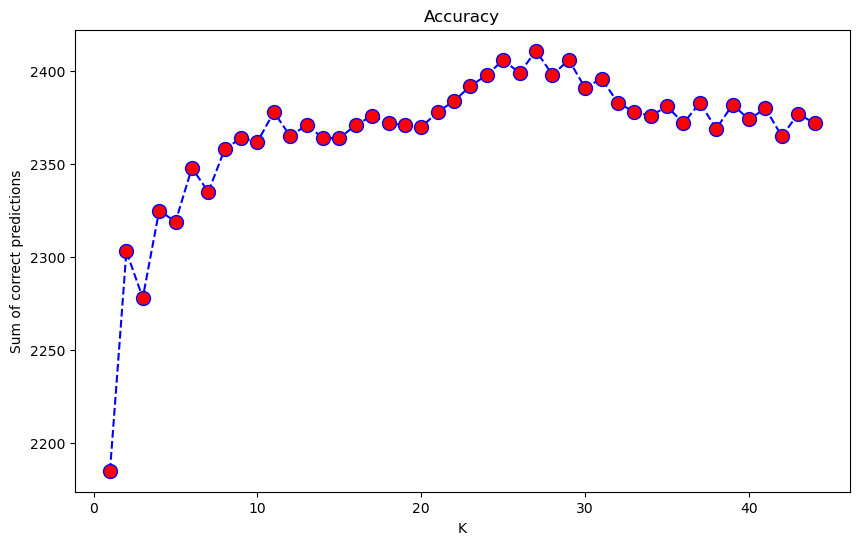

In [281]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45),correct_sum,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy')
plt.xlabel('K')
plt.ylabel('Sum of correct predictions')

In [282]:
result = pd.DataFrame(data= correct_sum)
result.index = result.index+1
result.T

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,2185,2303,2278,2325,2319,2348,2335,2358,2364,2362,...,2381,2372,2383,2369,2382,2374,2380,2365,2377,2372


In [286]:
print(correct_sum)

[2185, 2303, 2278, 2325, 2319, 2348, 2335, 2358, 2364, 2362, 2378, 2365, 2371, 2364, 2364, 2371, 2376, 2372, 2371, 2370, 2378, 2384, 2392, 2398, 2406, 2399, 2411, 2398, 2406, 2391, 2396, 2383, 2378, 2376, 2381, 2372, 2383, 2369, 2382, 2374, 2380, 2365, 2377, 2372]


In [327]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [329]:
accuracy_score(y_test,pred)

0.7783888709155613

In [331]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      2268
         1.0       0.68      0.31      0.43       823

    accuracy                           0.78      3091
   macro avg       0.74      0.63      0.65      3091
weighted avg       0.76      0.78      0.75      3091



### Check Training vs. Testing Accuracy to detect overfitting or underfitting 

In [237]:
# Training accuracy
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Testing accuracy (already calculated in the notebook)
test_accuracy = accuracy_score(y_test, pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.7775620579669948
Testing Accuracy: 0.7783888709155613


### The model performs slightly better on the training data compared to the testing data, but the difference is not very large. This suggests that the model is not heavily overfitting.

## Plotting a confuion matrix grapgh

In [241]:
cm = confusion_matrix(y_test, pred)


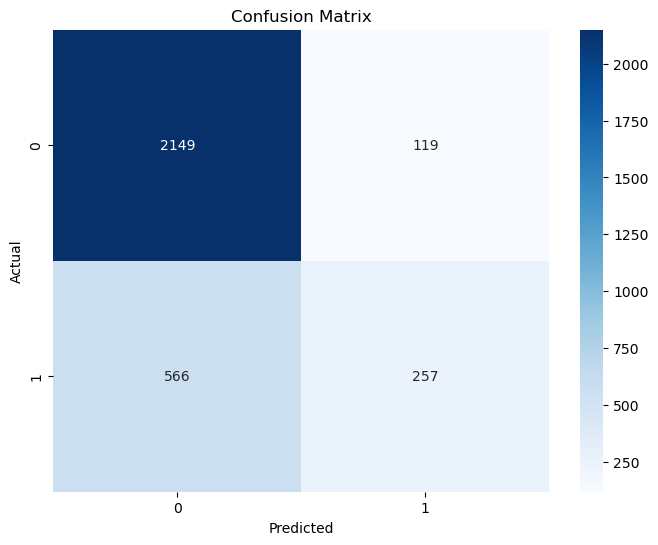

In [243]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


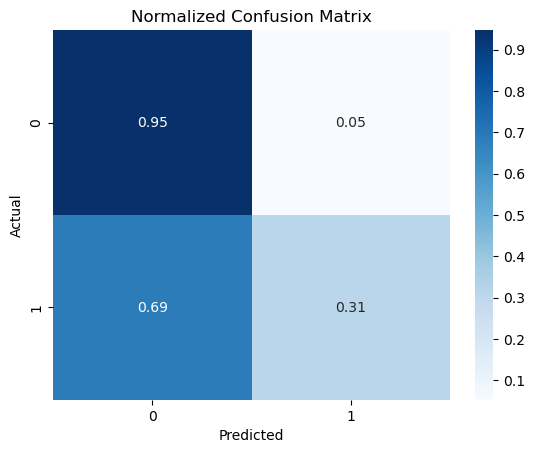

In [245]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()
